# Fitting 1-D model to averaged data (N = 8)

In [1]:
import sys
sys.path.append('../../')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import itertools
import nibabel as nib
import numpy as np
import pandas as pd
import h5py
import itertools
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import figure
import binning_eccen
import pytorch_1D_model_fitting as fitting
import torch

Let's load (or make) averaged data across subjects.

In [7]:
avg_subj_df = binning_eccen.get_all_subj_df(subjects_to_run=np.arange(1, 9), central_tendency=["mean"], dv_to_group=["vroinames", "eccrois", "freq_lvl"])

In [4]:
avg_subj_df.head()

,vroinames,eccrois,freq_lvl,avg_betas,local_ori,local_sf,subj
0,V1,1.0,0,1.383799,1.572508,2.545116,avg
1,V1,1.0,1,1.461951,1.572508,4.563121,avg
2,V1,1.0,2,1.338134,1.572508,8.689569,avg
3,V1,1.0,3,1.338733,1.570419,16.081422,avg
4,V1,1.0,4,1.147762,1.572508,30.195154,avg


Let's check if the shape is right. The total length of the dataframe should be (num. of subjects) X (num. of visual ROIs) X (num. of eccentricity bins) X (num. of frequency level). The number of eccentricity bins is currently 5 and we have 6 different frequency levels. So, the number of rows should be 1 X 4 X 5 X 6 = 120.

In [8]:
print(avg_subj_df.shape[0])

120


Now we can fit the 1D model for each visual ROI and for each eccentricity bin. Our goal is to find optimized values of amplitude, mode (highest peak), and sigma of the log pdf function. I first set all initial values of the parameters as 1, but it seems that sigma tends to get bigger than 1. My learning rate was set as 0.05, but it seems that I will need to find a way to optimize this learning rate for each subject, because for some subjects this learning rate returned NaN values for the parameters that I want to optimize.

In [19]:
output_df = fitting.pytorch_1D_model_fitting(input_df=avg_subj_df, subj_list=None, initial_val = [1, 1, 1], epoch=5000, alpha=0.05, save_output_df=True)

epoch 0 loss 1.332
epoch 500 loss 0.016
epoch 1000 loss 0.013
epoch 1500 loss 0.012
epoch 2000 loss 0.012
epoch 2500 loss 0.012
epoch 3000 loss 0.012
epoch 3500 loss 0.012
epoch 4000 loss 0.012
epoch 4500 loss 0.012
*** avg V1 ecc 1.0 finished ***
amplitude 1.49, mode 5.87, sigma 3

epoch 0 loss 3.97
epoch 500 loss 0.004
epoch 1000 loss 0.004
epoch 1500 loss 0.004
epoch 2000 loss 0.004
epoch 2500 loss 0.004
epoch 3000 loss 0.004
epoch 3500 loss 0.004
epoch 4000 loss 0.004
epoch 4500 loss 0.004
*** avg V1 ecc 2.0 finished ***
amplitude 2.66, mode 4.16, sigma 2

epoch 0 loss 5.869
epoch 500 loss 0.007
epoch 1000 loss 0.007
epoch 1500 loss 0.007
epoch 2000 loss 0.007
epoch 2500 loss 0.007
epoch 3000 loss 0.007
epoch 3500 loss 0.007
epoch 4000 loss 0.007
epoch 4500 loss 0.007
*** avg V1 ecc 3.0 finished ***
amplitude 3.33, mode 3.12, sigma 2

epoch 0 loss 7.736
epoch 500 loss 0.016
epoch 1000 loss 0.016
epoch 1500 loss 0.016
epoch 2000 loss 0.016
epoch 2500 loss 0.016
epoch 3000 loss 0.016

Let's see the output dataframe. The way I organized the output was adding another three columns of amplitude, mode, sigma for each combination of subj & visual ROI & and eccentricity bin.

In [11]:
output_df

,subj,vroinames,cur_ecc,amp,mode,sigma
0,avg,V1,1.0,1.493002,5.869890,2.586703
1,avg,V1,2.0,2.655461,4.157609,2.499598
2,avg,V1,3.0,3.327586,3.121619,2.404332
3,avg,V1,4.0,3.982470,1.890933,2.222005
4,avg,V1,5.0,3.188327,1.611911,2.354239
5,avg,V2,1.0,1.649395,4.373339,3.351526
6,avg,V2,2.0,2.296685,3.748462,3.727007
7,avg,V2,3.0,2.633106,3.254839,3.693993
8,avg,V2,4.0,2.592952,1.628004,2.966050
9,avg,V2,5.0,2.190859,1.162621,2.802070


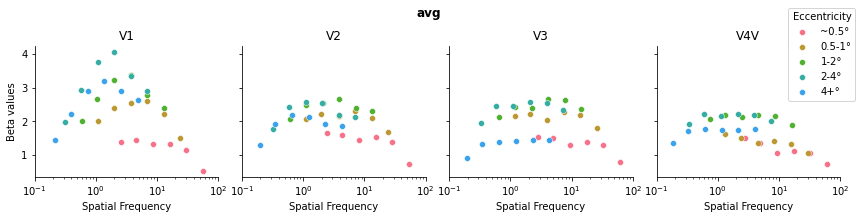

In [13]:
grid = binning_eccen.scatterplot_2D(mean_df=avg_subj_df, subj='avg', save_fig=False)

This part of code will look a lot messy, because I'm still trying to figure out how I should organize my output and how I can plot the datapoints and log normal pdf functions together using seaborn package. But for now I just wanted to check if I found right peak (mode) for each eccentricity bin, so I just made a long messy snippet of code for plotting all of them.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

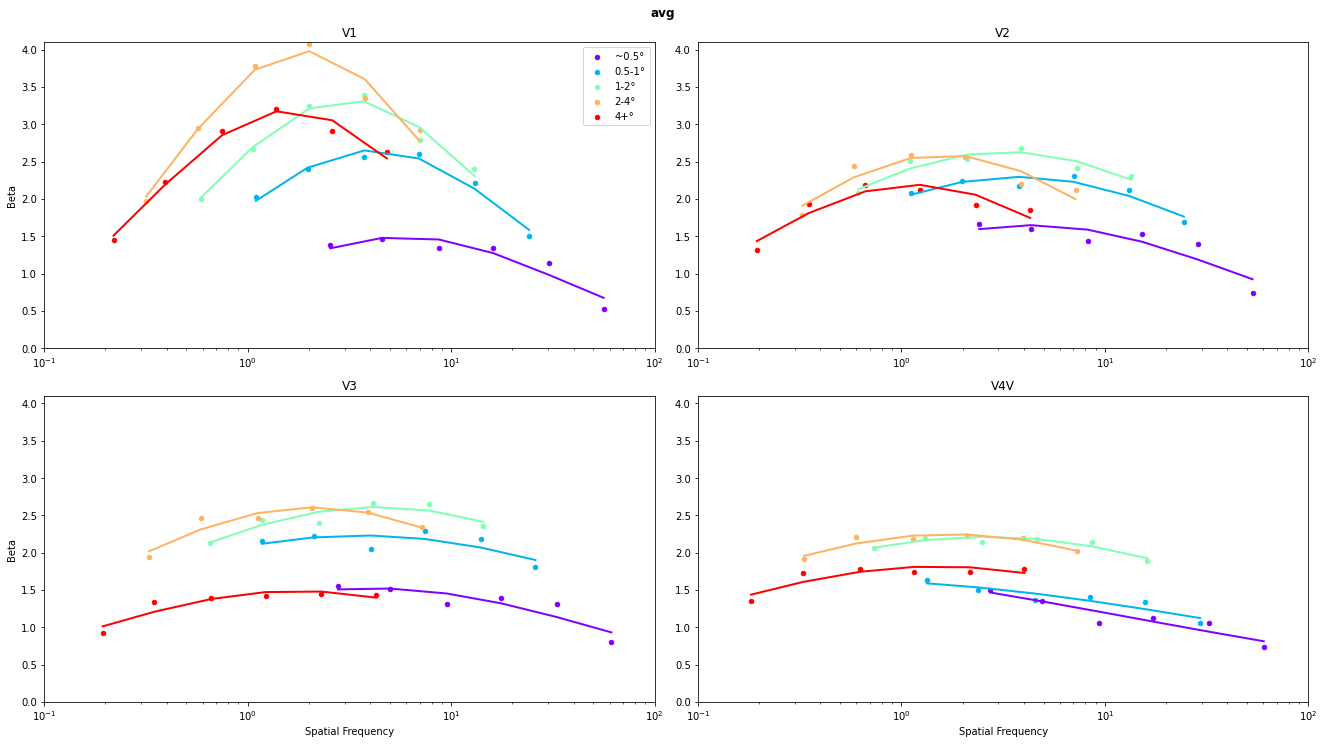

In [18]:
subj_list=np.unique(output_df['subj'])
labels=['~0.5°', '0.5-1°', '1-2°', '2-4°', '4+°']
label_nums = np.linspace(0,1,len(labels))
color = plt.cm.rainbow(label_nums)
for sn in subj_list:

    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle(sn, fontweight="bold")
    axes = fig.subplots(nrows=2, ncols = 2)
    vroi_list = output_df.vroinames.unique()
    eccrois_list = output_df.eccrois.unique()
    for cur_roi, cur_ecc in itertools.product(vroi_list, eccrois_list):
        if cur_roi == 'V1':
            cur_row = 0
            cur_col = 0
        elif cur_roi == 'V2':
            cur_row = 0
            cur_col = 1
        elif cur_roi == 'V3':
            cur_row = 1
            cur_col = 0
        elif cur_roi == 'V4v':
            cur_row = 1
            cur_col = 1
        cur_idx = cur_row * 2 + cur_col
        if cur_row == 1:
            axes[cur_row, cur_col].set_xlabel("Spatial Frequency")
        if cur_col == 0:
            axes[cur_row, cur_col].set_ylabel("Beta")

        cur_dot_df = all_subj_df.query('(subj == @sn) & (vroinames == @cur_roi) & (eccrois == @cur_ecc)')
        cur_line_df = output_df.query('(subj == @sn) & (vroinames == @cur_roi) & (eccrois == @cur_ecc)')
        x = cur_dot_df.local_sf
        y = cur_dot_df.avg_betas
        y_pdf = fitting.np_log_norm_pdf(x.values, cur_line_df.amp.item(), cur_line_df['mode'].item(), cur_line_df.sigma.item())
        axes[cur_row, cur_col].scatter(x, y, s=20, c=color[int(cur_ecc-1),:], label=labels[int(cur_ecc-1)])
        axes[cur_row, cur_col].plot(x, y_pdf, linewidth=2, color=color[int(cur_ecc-1)])
        axes[cur_row, cur_col].set_title(f'{cur_roi.title()}')
        axes[cur_row, cur_col].set_xlim([10**-1, 10**2])
        axes[cur_row, cur_col].set_xscale('log')
        axes[cur_row, cur_col].set_ylim([0, 4.1])
        if cur_idx == 0:
            axes[cur_row, cur_col].legend(loc="upper right")

    plt.tight_layout()
    plt.show()
    plt.xscale('log')
    plt.close()